### mmm 

In [34]:
import numpy as np

from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [35]:
# Download the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [36]:
# The training data has 60000 samples (28x28 images)
print train_images.shape
# Each image has a label (0 to 9)
print len(train_labels)
train_labels

(60000, 28, 28)
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [37]:
# The test data has 10000 samples (28x28 images)
print test_images.shape
# Each image has a label (0 to 9)
print len(test_labels)
test_labels

(10000, 28, 28)
10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [38]:
# Reshape the samples (each sample has 28*28 'features') and normalize between 0-1
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

val_images = train_images[:15000,:]
val_labels = train_labels[:15000,:]

train_images = train_images[15000:,:]
train_labels = train_labels[15000:,:]


In [39]:
# Define the network (one layer of 512 units and an output of 10 units)
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history1 = network.fit(train_images, train_labels, epochs=25, batch_size=128, validation_data=(val_images, val_labels))

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 1s 31us/step - loss: 0.6025 - acc: 0.8321 - val_loss: 0.3447 - val_acc: 0.8985
Epoch 2/25
45000/45000 [==============================] - 1s 21us/step - loss: 0.2730 - acc: 0.9199 - val_loss: 0.2582 - val_acc: 0.9240
Epoch 3/25
45000/45000 [==============================] - 1s 21us/step - loss: 0.2254 - acc: 0.9333 - val_loss: 0.2520 - val_acc: 0.9281
Epoch 4/25
45000/45000 [==============================] - 1s 24us/step - loss: 0.1964 - acc: 0.9420 - val_loss: 0.2032 - val_acc: 0.9411
Epoch 5/25
45000/45000 [==============================] - 1s 20us/step - loss: 0.1782 - acc: 0.9465 - val_loss: 0.2044 - val_acc: 0.9402
Epoch 6/25
45000/45000 [==============================] - 1s 23us/step - loss: 0.1641 - acc: 0.9500 - val_loss: 0.1792 - val_acc: 0.9459
Epoch 7/25
45000/45000 [==============================] - 1s 25us/step - loss: 0.1512 - acc: 0.9547 - val_loss: 0.1813 - val_acc

In [31]:
network = models.Sequential()
network.add(layers.Dense(8, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history2 = network.fit(train_images, train_labels, epochs=25, batch_size=128, validation_data=(val_images, val_labels))

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 2s 38us/step - loss: 0.7809 - acc: 0.7478 - val_loss: 0.4719 - val_acc: 0.8563
Epoch 2/25
45000/45000 [==============================] - 1s 20us/step - loss: 0.3843 - acc: 0.8838 - val_loss: 0.3660 - val_acc: 0.8946
Epoch 3/25
45000/45000 [==============================] - 1s 20us/step - loss: 0.3235 - acc: 0.9015 - val_loss: 0.3239 - val_acc: 0.9083
Epoch 4/25
45000/45000 [==============================] - 1s 20us/step - loss: 0.2857 - acc: 0.9136 - val_loss: 0.3053 - val_acc: 0.9095
Epoch 5/25
45000/45000 [==============================] - 1s 20us/step - loss: 0.2596 - acc: 0.9207 - val_loss: 0.2805 - val_acc: 0.9160
Epoch 6/25
45000/45000 [==============================] - 1s 20us/step - loss: 0.2431 - acc: 0.9260 - val_loss: 0.3040 - val_acc: 0.9075
Epoch 7/25
45000/45000 [==============================] - 1s 20us/step - loss: 0.2306 - acc: 0.9303 - val_loss: 0.2819 - val_acc

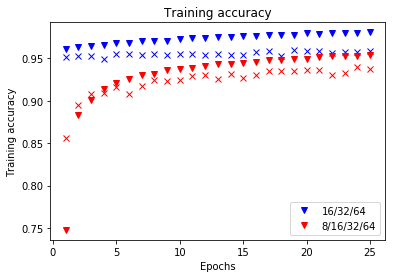

In [33]:
# Plot the training accuracy

epochs = range(1, len(history1.history['acc']) + 1)

plt.plot(epochs, history1.history['acc'], 'bv', label='16/32/64')
plt.plot(epochs, history1.history['val_acc'], 'bx')

plt.plot(epochs, history2.history['acc'], 'rv', label='8/16/32/64')
plt.plot(epochs, history2.history['val_acc'], 'rx')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy')
plt.legend()

In [48]:
# Evaluate the performance of the model on the test data
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 52us/step
('test_acc:', 0.9826)
